# Bài Làm: Diabetes

## Mô tả Project: Phân tích dữ liệu bệnh tiểu đường

Project này tập trung vào phân tích tập dữ liệu bệnh tiểu đường để hiểu rõ hơn về các yếu tố liên quan đến việc mắc bệnh. Các bước phân tích đã thực hiện bao gồm:

1.  **Tải dữ liệu**: Đọc dữ liệu từ tệp "diabetes.csv" vào DataFrame.
2.  **Xem thông tin chung**: Kiểm tra kích thước của tập dữ liệu, tên các cột và kiểu dữ liệu của từng cột.
3.  **Thống kê mô tả**: Xem các thống kê cơ bản như trung bình, độ lệch chuẩn, min, max, tứ phân vị cho các cột số.
4.  **Kiểm tra giá trị thiếu hoặc 0 bất hợp lý**: Xác định số lượng giá trị 0 trong mỗi cột, điều này hữu ích cho việc xử lý dữ liệu sau này (ví dụ: các giá trị 0 trong BloodPressure, Glucose, SkinThickness, Insulin, BMI có thể là thiếu).
5.  **Phân tích tỷ lệ người mắc bệnh / không mắc**: Trực quan hóa sự phân bố của biến "Outcome" (mắc bệnh/không mắc bệnh) để xem sự mất cân bằng lớp.
6.  **Ma trận tương quan**: Tính toán và trực quan hóa ma trận tương quan giữa các thuộc tính để hiểu mối quan hệ tuyến tính giữa chúng.
7.  **Boxplot để so sánh nhóm Outcome**: Sử dụng biểu đồ boxplot để so sánh sự phân bố của các thuộc tính quan trọng (Glucose, BMI, Age, Insulin, BloodPressure) giữa hai nhóm mắc bệnh và không mắc bệnh.

Nhìn chung, project này là một bước khám phá dữ liệu ban đầu để hiểu cấu trúc, đặc điểm và mối quan hệ giữa các biến trong tập dữ liệu bệnh tiểu đường, đặt nền tảng cho các bước xử lý dữ liệu và xây dựng mô hình dự đoán sau này.

## Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc dữ liệu

In [ ]:
df = pd.read_csv("diabetes.csv")

## Xem thông tin chung

In [ ]:
print("Shape:", df.shape)
print("\nCác cột dữ liệu:", df.columns.tolist())
print("\nThông tin tổng quát:")
print(df.info())

Shape: (768, 9)

Các cột dữ liệu: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Thông tin tổng quát:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## Thống kê mô tả

In [ ]:
print("\nThống kê mô tả:\n", df.describe())


Thống kê mô tả:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000

## Kiểm tra giá trị thiếu hoặc 0 bất hợp lý

In [ ]:
print("\nSố lượng giá trị bằng 0 theo cột:")
print((df == 0).sum())


Số lượng giá trị bằng 0 theo cột:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


## Tỷ lệ người mắc bệnh / không mắc

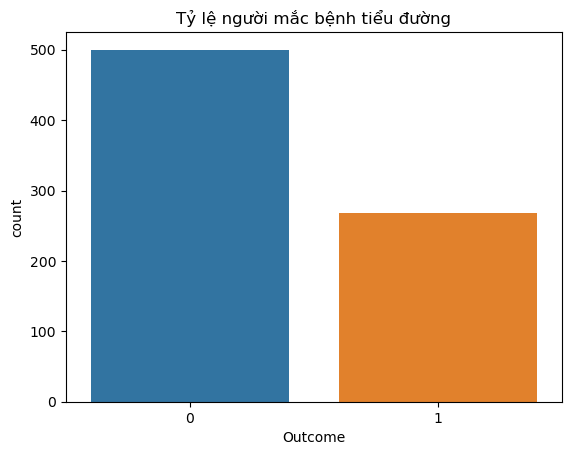

In [ ]:
sns.countplot(x="Outcome", data=df)
plt.title("Tỷ lệ người mắc bệnh tiểu đường")
plt.show()

## Ma trận tương quan

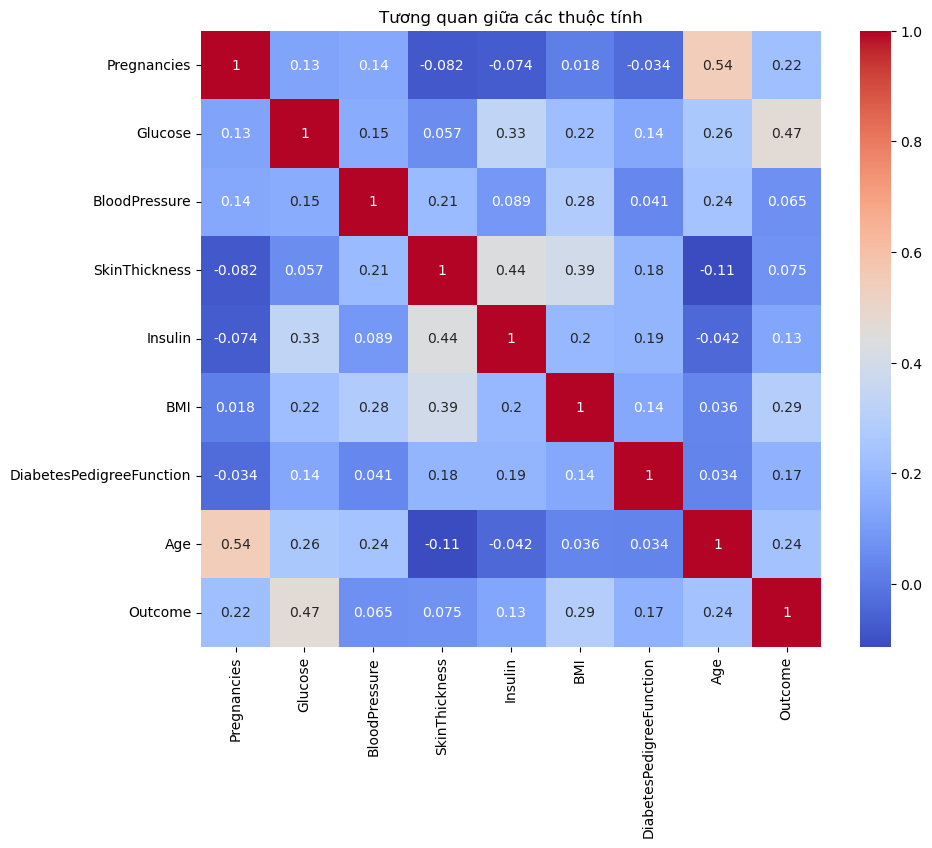

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Tương quan giữa các thuộc tính")
plt.show()


## Boxplot để so sánh nhóm Outcome

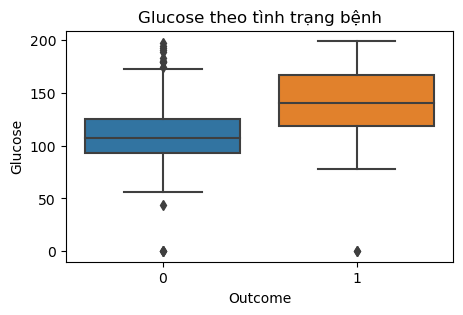

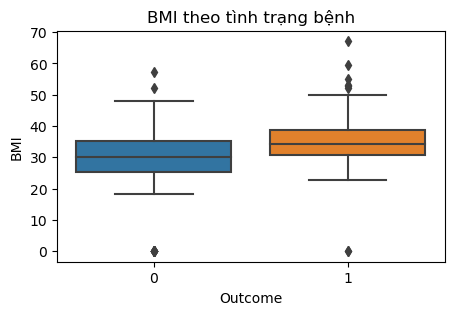

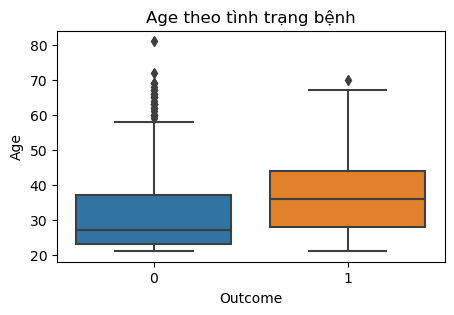

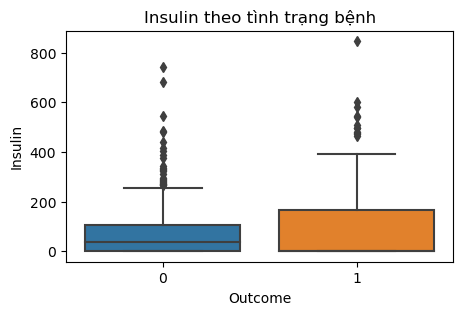

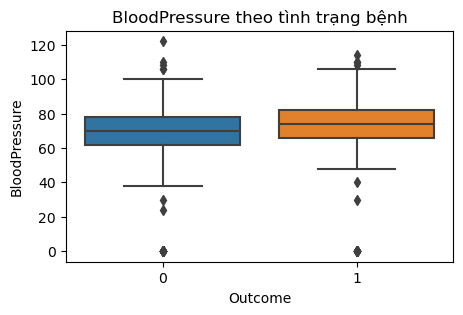

In [ ]:
for col in ["Glucose", "BMI", "Age", "Insulin", "BloodPressure"]:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"{col} theo tình trạng bệnh")
    plt.show()

# Kết Thúc